<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Lecture_Activity_12_AUTOML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 2.0 MB/s eta 0:00:00


In [50]:
from flaml import AutoML
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import numpy as np
import os

In [1]:
!git clone https://github.com/Walmond3/WIX3001-Alt-Ass

Cloning into 'WIX3001-Alt-Ass'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 253.09 KiB | 2.51 MiB/s, done.


In [3]:

def crop_image_into_pieces(image_path, output_folder, rows, columns, owner):
    # Open the image
    image = Image.open(image_path)

    # Convert image to RGB mode (remove alpha channel)
    image = image.convert("RGB")

    # Get the dimensions of the original image
    original_width, original_height = image.size

    # Calculate the width and height of each piece
    piece_width = original_width // columns
    piece_height = original_height // rows

    # Initialize a list to store data for each cropped image
    cropped_images_data = []

    # Iterate through each row and column
    for row in range(rows):
        for col in range(columns):
            # Calculate the coordinates for cropping
            left = col * piece_width
            upper = row * piece_height
            right = left + piece_width
            lower = upper + piece_height

            # Crop the image
            cropped_img = image.crop((left, upper, right, lower))

            # Invert the colors
            inverted_img = ImageOps.invert(cropped_img)

            # Create output subfolder if it doesn't exist
            os.makedirs(output_folder, exist_ok=True)

            # Save the cropped image
            output_filename = f"{owner}_crop_{row}_{col}.jpg"
            output_filepath = os.path.join(output_folder, output_filename)
            inverted_img.save(output_filepath)

            # Append data to the list for DataFrame
            cropped_images_data.append({
                "Filename": output_filename,
                "Filepath": output_filepath,
                "Owner": owner
            })
            # print(f"Saved {output_filename}")

    print(f"All crops for {owner} saved!")

    return cropped_images_data

# Directory where the images are stored
images_directory = "/content/WIX3001-Alt-Ass/Handwriting"

# Output folder to save cropped images within Colab
output_folder = "/content/output_crops"

# Number of rows and columns in the grid
rows = 12
columns = 12

# Check if the images directory exists
if not os.path.exists(images_directory):
    print(f"Error: {images_directory} does not exist.")
    exit()

# List all files in the images directory
image_files = os.listdir(images_directory)

# Check if there are any image files
if not image_files:
    print(f"No image files found in {images_directory}.")
    exit()

# Initialize a list to store all cropped images data
all_cropped_images_data = []

# Iterate through each image file
for image_file in image_files:
    image_path = os.path.join(images_directory, image_file)
    owner, _ = os.path.splitext(image_file)  # Get owner from filename without extension
    cropped_images_data = crop_image_into_pieces(image_path, output_folder, rows, columns, owner)

    # Testing
    all_cropped_images_data.extend(cropped_images_data)

All crops for Yan Hao saved!
All crops for Jin Khye saved!
All crops for Yee Sem saved!
All crops for Yan Ho saved!
All crops for Hui Yi saved!


In [4]:
# Create a DataFrame from the list of cropped images data
df = pd.DataFrame(all_cropped_images_data)
df.head()

,Filename,Filepath,Owner
0,Yan Hao_crop_0_0.jpg,/content/output_crops/Yan Hao_crop_0_0.jpg,Yan Hao
1,Yan Hao_crop_0_1.jpg,/content/output_crops/Yan Hao_crop_0_1.jpg,Yan Hao
2,Yan Hao_crop_0_2.jpg,/content/output_crops/Yan Hao_crop_0_2.jpg,Yan Hao
3,Yan Hao_crop_0_3.jpg,/content/output_crops/Yan Hao_crop_0_3.jpg,Yan Hao
4,Yan Hao_crop_0_4.jpg,/content/output_crops/Yan Hao_crop_0_4.jpg,Yan Hao


Owner :  Yan Hao
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=30x30 at 0x78BFB8B57E50>


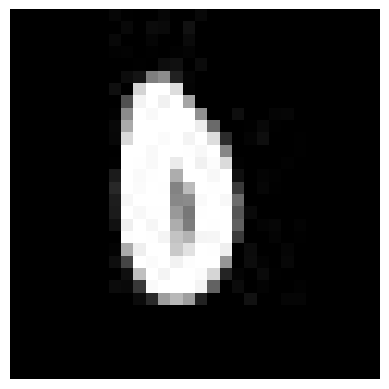

In [15]:
idx = 1
print("Owner : ",df['Owner'][idx])
path = df['Filepath'][idx]
img = Image.open(path)
print(img)
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
def process_img(image_path):
  image = Image.open(image_path)
  image_array = np.array(image)
  image_array_normalized = image_array / 255.0
  image_array_flatten = image_array_normalized.flatten()
  return image_array_flatten

In [33]:
label_mapping = {'Yan Ho' : 0,'Jin Khye' : 1,'Hui Yi' : 2,'Yee Sem' : 3,'Yan Hao' : 4}
target = np.array(df['Owner'].map(label_mapping))
features = np.array([process_img(filepath) for filepath in df['Filepath']])

In [34]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 42)

In [36]:
automl = AutoML()

automl_settings = {
    'time_budget' : 100, # in seconds
    'metric' : 'accuracy',
    'task' : 'classification',
    'log_file_name' : 'handwritting.log'
}

automl.fit(X_train,y_train,**automl_settings)

[flaml.automl.logger: 05-31 06:18:34] {1680} INFO - task = classification
[flaml.automl.logger: 05-31 06:18:34] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 05-31 06:18:34] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 05-31 06:18:34] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 05-31 06:18:34] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-31 06:18:36] {2345} INFO - Estimated sufficient time budget=15815s. Estimated necessary time budget=365s.
[flaml.automl.logger: 05-31 06:18:36] {2392} INFO -  at 1.7s,	estimator lgbm's best error=0.6349,	best estimator lgbm's best error=0.6349
[flaml.automl.logger: 05-31 06:18:36] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-31 06:18:38] {2392} INFO -  at 3.4s,	estimator lgbm's best error=0.6190,	best estimator lgbm's best error=0.6190
[flaml.automl.logger: 05-31

In [60]:
# Get the best model
best_model = automl.model
print("Best Model : ", best_model)

print()

# Get the best configuration
best_config = automl.best_config
print("Best configuration : ",best_config)

print()

# Get the best accuracy score on validation data
best_score = automl.best_loss
print("Bes Accuracy Score : ", 1 - round(best_score,4))

print()

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy on Test Set : ", accuracy)

print()

# Calculate the f1-score
# micro - Computes the F1 score by globally counting the total true positives,
#         false negatives, and false positives across all classes. [Suitable for multilabel classification]
#
# macro - Computes the F1 score for each class independently and then takes the unweighted mean of these scores.
#
# weighted - Computes the F1 score for each class independently and then takes the mean of these scores, weighted
#            by the support of each class
#          - Takes into account the number of true instances for each class, giving more importance to classes
#            with more instances.
#
# samples - Computes the F1 score for each instance and then averages these scores.
#         - Suitable for multilabel classification where you want to average over the sample rather than the label.
f1 = f1_score(y_test,y_pred,average =  'micro')
print("F1 Score on Test Set : ",f1)

print()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : ")
print(conf_matrix)

print()

# Generate classification report
class_report = classification_report(y_test,y_pred,target_names = label_mapping.keys())
print("Classification Report : ")
print(class_report)

Best Model :  <flaml.automl.model.ExtraTreesEstimator object at 0x78bfb8da30a0>

Best configuration :  {'n_estimators': 6, 'max_features': 0.1331147856067526, 'max_leaves': 32, 'criterion': 'entropy'}

Bes Accuracy Score :  0.6667000000000001

Accuracy on Test Set :  0.4930555555555556

F1 Score on Test Set :  0.4930555555555556

Confusion Matrix : 
[[14  3  4  1  0]
 [ 3 13  3  2  5]
 [ 4  4 13  3  2]
 [ 8  7  3 11  7]
 [ 3  5  2  4 20]]

Classification Report : 
              precision    recall  f1-score   support

      Yan Ho       0.44      0.64      0.52        22
    Jin Khye       0.41      0.50      0.45        26
      Hui Yi       0.52      0.50      0.51        26
     Yee Sem       0.52      0.31      0.39        36
     Yan Hao       0.59      0.59      0.59        34

    accuracy                           0.49       144
   macro avg       0.50      0.51      0.49       144
weighted avg       0.50      0.49      0.49       144

